In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-data-set/teamwise_home_and_away.csv
/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv
/kaggle/input/ipl-data-set/matches.csv
/kaggle/input/ipl-data-set/teams.csv
/kaggle/input/ipl-data-set/Players.xlsx
/kaggle/input/ipl-data-set/deliveries.csv


In [2]:
xl = pd.read_excel('/kaggle/input/ipl-data-set/Players.xlsx')
print(xl)
teams = pd.read_csv("/kaggle/input/ipl-data-set/teams.csv")
deliveries = pd.read_csv("/kaggle/input/ipl-data-set/deliveries.csv")
matches = pd.read_csv("/kaggle/input/ipl-data-set/matches.csv",parse_dates=['date'])
teamwise_home_and_away = pd.read_csv("/kaggle/input/ipl-data-set/teamwise_home_and_away.csv")
most_runs_average_strikerate = pd.read_csv("/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv")

        Player_Name        DOB Batting_Hand           Bowling_Skill   Country
0    A Ashish Reddy 1991-02-24   Right_Hand        Right-arm medium     India
1        A Chandila 1983-12-05   Right_Hand      Right-arm offbreak     India
2          A Chopra 1977-09-19   Right_Hand      Right-arm offbreak     India
3       A Choudhary        NaT   Right_hand    Left-arm fast-medium       NaN
4       A Dananjaya        NaT   Right_Hand      Right-arm offbreak       NaN
..              ...        ...          ...                     ...       ...
561     Younis Khan 1977-11-29   Right_Hand        Right-arm medium  Pakistan
562       YS Chahal 1990-07-23   Right_Hand         Legbreak googly     India
563    Yuvraj Singh 1981-12-12    Left_Hand  Slow left-arm orthodox     India
564     YV Takawale 1984-11-05   Right_Hand                     NaN     India
565          Z Khan 1978-10-07   Right_Hand    Left-arm fast-medium     India

[566 rows x 5 columns]


In [3]:
print(teams.info())
print("No. of teams: ",teams['team1'].nunique())
teams['team1'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes
None
No. of teams:  15


array(['Pune Warriors', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Kochi Tuskers Kerala', 'Gujarat Lions', 'Chennai Super Kings',
       'Rising Pune Supergiants', 'Delhi Daredevils', 'Deccan Chargers',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kings XI Punjab'], dtype=object)

In [4]:
print(deliveries.info())
deliveries.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [5]:
print(matches.info())
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   Season           756 non-null    object        
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id="1"></a>
<font size="+2" color="blue"><b>Cleaning</b></font><br>

In [6]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)


In [7]:
print("No. of Umpires 1: ",matches['umpire1'].nunique())
print("No. of Umpires 2: ",matches['umpire2'].nunique())
print("No. of Umpires 3: ",matches['umpire3'].nunique())

ump_set1 = set(matches['umpire1'].unique())               
ump_set2 = set(matches['umpire2'].unique())
ump_set3 = set(matches['umpire3'].unique())
all_set = ump_set1.intersection(ump_set2)
all_set = all_set.intersection(ump_set3)
print("Umpires who umpired as 1st,2nd and 3rd umpires: ",all_set, len(all_set))

No. of Umpires 1:  61
No. of Umpires 2:  65
No. of Umpires 3:  25
Umpires who umpired as 1st,2nd and 3rd umpires:  {nan, 'Rod Tucker', 'A Nanda Kishore', 'Anil Chaudhary', 'C Shamshuddin', 'Yeshwant Barde', 'Nitin Menon', 'Ulhas Gandhe', 'S Ravi', 'Nigel Llong', 'Kumar Dharmasena', 'KN Ananthapadmanabhan', 'Ian Gould', 'Vineet Kulkarni', 'Anil Dandekar', 'K Ananthapadmanabhan', 'Bruce Oxenford', 'Chris Gaffaney', 'Nanda Kishore', 'O Nandan'} 20


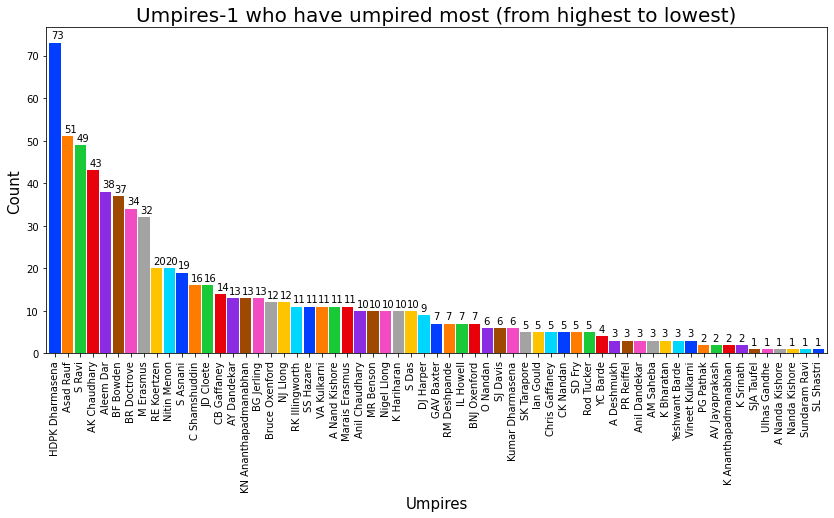

In [9]:
plt.subplots(figsize=(14,6))
ax=matches['umpire1'].value_counts().plot.bar(width=0.9,color=sns.color_palette('bright',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-1 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()

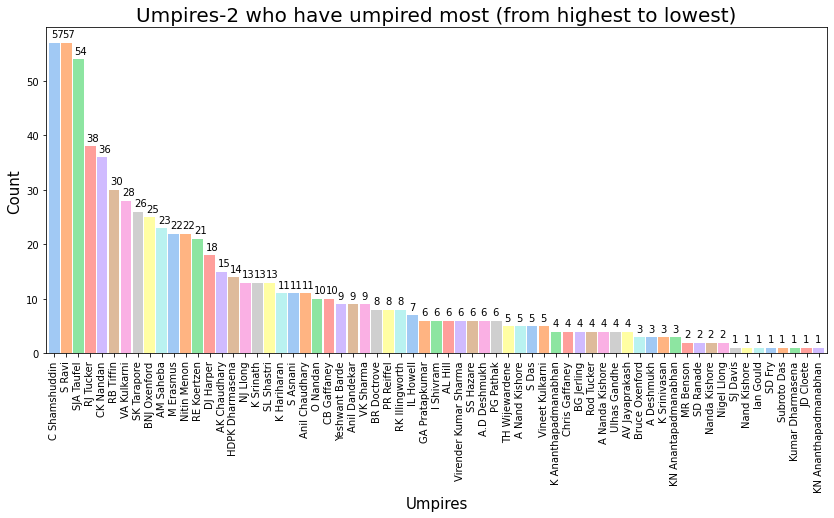

In [10]:
plt.subplots(figsize=(14,6))
ax=matches['umpire2'].value_counts().plot.bar(width=0.9,color=sns.color_palette('pastel',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-2 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()

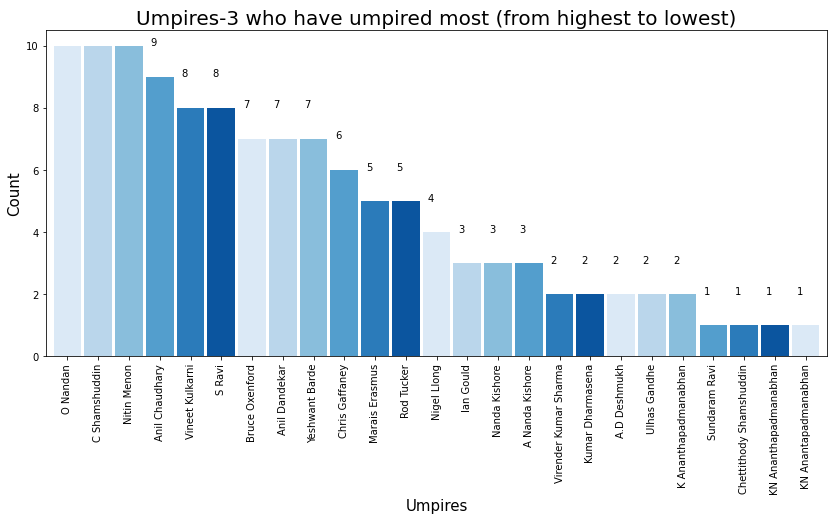

In [11]:
plt.subplots(figsize=(14,6))
ax=matches['umpire3'].value_counts().plot.bar(width=0.9,color=sns.color_palette('Blues'))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-3 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()

<a id="3"></a>
<font size="+2" color="blue"><b>Winning Teams</b></font><br>

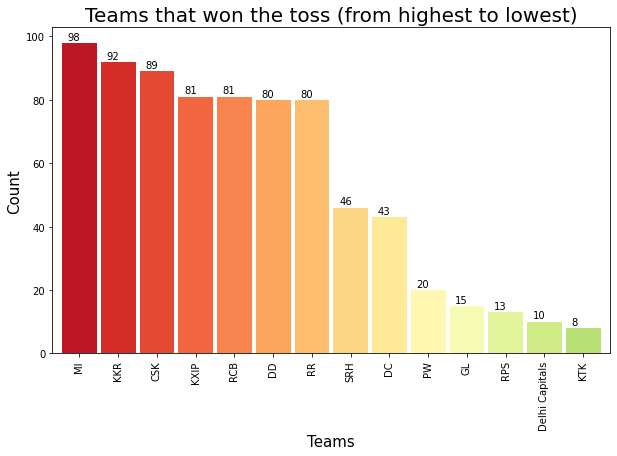

In [12]:
plt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Teams that won the toss (from highest to lowest)", fontsize=20)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

<a id="4"></a>
<font size="+2" color="blue"><b>Toss Decision</b></font><br>

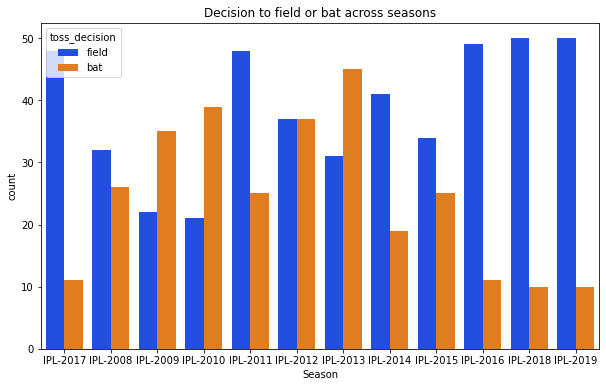

In [13]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Season',hue='toss_decision',data=matches ,palette=sns.color_palette('bright'))
plt.title("Decision to field or bat across seasons")
plt.show()

<a id="5"></a>
<font size="+2" color="blue"><b>Matches info</b></font><br>

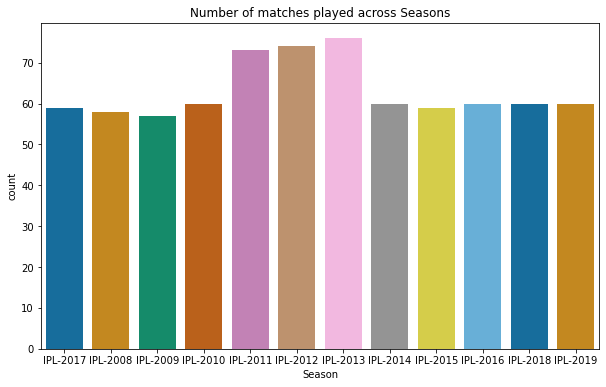

In [14]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Season',data=matches,palette=sns.color_palette('colorblind'))  #countplot automatically counts the frequency of an item
plt.title("Number of matches played across Seasons")
plt.show()

<a id="7"></a>
<font size="+2" color="blue"><b>Match Results</b></font><br>

In [16]:
not_same = matches[matches['toss_winner'] != matches['winner']]
same = matches[matches['toss_winner'] == matches['winner']]
print("Percentage of matches where toss winner is not same as winner: ",round(not_same.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where toss winner is same as winner: ", round(same.shape[0]/matches.shape[0],2) * 100)
toss_winner = pd.DataFrame({'result':['Yes','No'],'per':[same.shape[0], not_same.shape[0]] })
print(" = " * 40)
field = matches[matches['toss_decision'] == 'field']
bat = matches[matches['toss_decision'] == 'bat']
print("Percentage of matches where toss decision is 'field': ",round(field.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where toss decision is 'bat': ",round(bat.shape[0]/matches.shape[0],2) *100)
print(" = " * 40)
normal = matches[matches['result'] == 'normal']
tie = matches[matches['result'] == 'tie']
no_result = matches[matches['result'] == 'no result']
print("Percentage of matches where result is 'normal': ",round(normal.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where result is 'tie': ",round(tie.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where result is 'no result': ",round(no_result.shape[0]/matches.shape[0],2) *100)
result = pd.DataFrame({'Result':['Normal','Tie','No Result'],'per':[normal.shape[0], tie.shape[0], no_result.shape[0]] })
print(" = " * 40)
dl_applied_no = matches[matches['dl_applied'] == 0]
dl_applied_yes = matches[matches['dl_applied'] == 1]
dl = pd.DataFrame({'dl_applied':['yes','no'],'per':[dl_applied_yes.shape[0], dl_applied_no.shape[0]] })
print("Percentage of matches where DL is applied : ",round(dl_applied_yes.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where DL is not applied : ",round(dl_applied_no.shape[0]/matches.shape[0],2) *100)

# Pie Chart for Whether toss winner is same as match winner
fig = px.pie(toss_winner, values='per', names='result', color='result', title='Is Match winner same as toss winner?'
             ,color_discrete_map={'Yes':'lightcyan',
                                 'No':'royalblue' })
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Pie Chart for how many matches DL is applied
fig = px.pie(dl, values='per', names='dl_applied', title='Percentage of matches where DL is applied', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

labels = result['Result']
values = result['per']

# Pie Chart for results of the matches played
fig = go.Figure(data=[go.Pie(labels=labels,title='Result of matches', values=values, pull=[0, 0.2, 0])])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Percentage of matches where toss winner is not same as winner:  48.0
Percentage of matches where toss winner is same as winner:  52.0
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Percentage of matches where toss decision is 'field':  61.0
Percentage of matches where toss decision is 'bat':  39.0
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Percentage of matches where result is 'normal':  98.0
Percentage of matches where result is 'tie':  1.0
Percentage of matches where result is 'no result':  1.0
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Percentage of matches where DL is applied :  3.0
Percentage of matches where DL is not applied :  97.0


In [17]:
matches['date'].min(), matches['date'].max()

(Timestamp('2008-01-05 00:00:00'), Timestamp('2019-12-05 00:00:00'))

<a id="8"></a>
<font size="+2" color="blue"><b>Team wins</b></font><br>

In [18]:
teamwise_home_and_away.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
print(teamwise_home_and_away.info())
teamwise_home_and_away.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes
None


,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,RPS,5,5,8,8,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326
2,CSK,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,SRH,30,28,63,45,47.619048,62.222222


In [19]:
fig = go.Figure(data=[
    go.Bar(name='Home Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['home_win_percentage']),
    go.Bar(name='Away Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['away_win_percentage'])
])

fig.update_layout(barmode='group',title="Team wise - Home/Away wins")
fig.show()

<a id="9"></a>
<font size="+2" color="blue"><b>Batsmen Statistics</b></font><br>

In [20]:
most_runs_average_strikerate.info()
most_runs_average_strikerate.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top15 = most_runs_average_strikerate[:15]

fig = go.Figure()
fig.add_trace(go.Bar(
   y=top15['batsman'],
    x=top15['out'],
    name='No. of Matches',
    orientation='h',
    marker=dict(
        color='rgba(80, 100, 67, 0.6)',
        line=dict(color='rgba(8, 1, 212, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
   y=top15['batsman'],
    x=top15['strikerate'],
    name='Strike Rate',
    orientation='h',
    marker=dict(
        color='rgba(8, 1, 212, 0.6)',
        line=dict(color='rgba(8, 1, 212, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
   y=top15['batsman'],
    x=top15['average'],
    name='Average Runs',
    orientation='h',
    marker=dict(
        color='rgba(158, 5, 19, 0.6)',
        line=dict(color='rgba(158, 5, 19, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',title="Players - No. of matches, Strike Rate, Average Runs")
fig.show()